## import libraries

In [8]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np

## Device configuration

In [9]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
train_on_gpu = torch.cuda.is_available()
if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

CUDA is available!  Training on GPU ...


## Hyper-parameters 

In [10]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

## Load and Visualize the MNIST dataset 

In [11]:
train_dataset = torchvision.datasets.MNIST(root='../../data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='../../data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

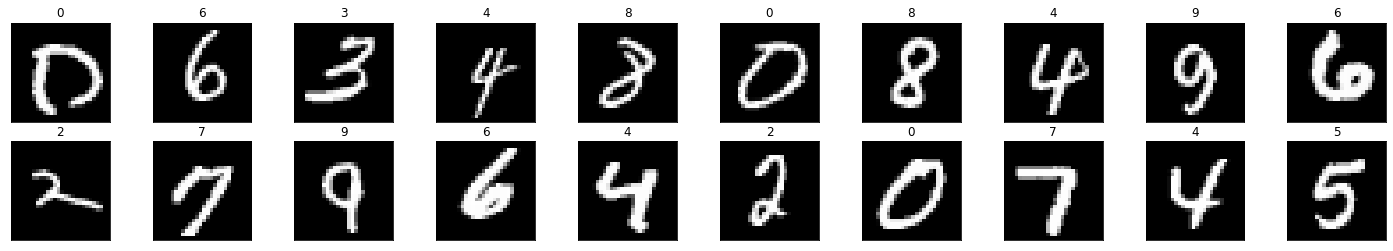

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

## Fully connected neural network with one hidden layer

In [13]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

## Model

In [14]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)
print(model)

NeuralNet(
  (fc1): Linear(in_features=784, out_features=500, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


## Loss and optimizer function

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

## Train the model

In [16]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))


Epoch [1/5], Step [100/600], Loss: 0.4065
Epoch [1/5], Step [200/600], Loss: 0.3022
Epoch [1/5], Step [300/600], Loss: 0.2132
Epoch [1/5], Step [400/600], Loss: 0.2427
Epoch [1/5], Step [500/600], Loss: 0.1039
Epoch [1/5], Step [600/600], Loss: 0.3132
Epoch [2/5], Step [100/600], Loss: 0.1048
Epoch [2/5], Step [200/600], Loss: 0.2017
Epoch [2/5], Step [300/600], Loss: 0.0946
Epoch [2/5], Step [400/600], Loss: 0.1723
Epoch [2/5], Step [500/600], Loss: 0.0917
Epoch [2/5], Step [600/600], Loss: 0.0686
Epoch [3/5], Step [100/600], Loss: 0.0630
Epoch [3/5], Step [200/600], Loss: 0.0899
Epoch [3/5], Step [300/600], Loss: 0.0963
Epoch [3/5], Step [400/600], Loss: 0.0411
Epoch [3/5], Step [500/600], Loss: 0.1339
Epoch [3/5], Step [600/600], Loss: 0.0368
Epoch [4/5], Step [100/600], Loss: 0.0609
Epoch [4/5], Step [200/600], Loss: 0.0070
Epoch [4/5], Step [300/600], Loss: 0.0666
Epoch [4/5], Step [400/600], Loss: 0.0441
Epoch [4/5], Step [500/600], Loss: 0.0320
Epoch [4/5], Step [600/600], Loss:

## Test the model
In test phase, we don't need to compute gradients (for memory efficiency)

In [17]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))

Accuracy of the network on the 10000 test images: 97.83 %


In [18]:
#torch.save(model.state_dict(), 'model.ckpt')
print("The state dic keys: \n\n", model.state_dict().keys())

The state dic keys: 

 odict_keys(['fc1.weight', 'fc1.bias', 'fc2.weight', 'fc2.bias'])
